In [61]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd 
import numpy as np 


In [8]:
X,y = make_classification(n_samples=1000,random_state=32,n_features=5)

In [12]:
X_train,X_test,Y_train,Y_test =train_test_split(X,y,train_size=0.70,random_state=42)

In [13]:
X_train.shape

(700, 5)

In [14]:
X_test.shape

(300, 5)

In [15]:
Y_train.shape

(700,)

In [16]:
Y_test.shape

(300,)

In [19]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy_score(Y_test,y_pred)

0.99

In [27]:
confusion_matrix(Y_test,y_pred)

array([[149,   2],
       [  1, 148]], dtype=int64)

In [28]:
model.score(X_train,Y_train)

0.9885714285714285

In [1]:
# New Dataset

In [4]:
import seaborn as sns 


df = sns.load_dataset('iris')

In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.shape

(150, 5)

In [8]:
df = df[df['species']!='setosa']


In [9]:
df.shape

(100, 5)

In [10]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [11]:
df['species'] = df['species'].map({"versicolor":"0","virginica":"1"})

In [12]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [13]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: object

In [15]:
X_train,X_test,Y_train,Y_test =train_test_split(X,y,train_size=0.70,random_state=42)

X_train.shape

(70, 4)

In [16]:
Y_train.shape

(70,)

In [19]:
mymodel = LogisticRegression()

In [20]:
from sklearn.model_selection import GridSearchCV

In [80]:
params = {'C':[0.5,1,2,4,6,7,8,9,10,45,30],'penalty':['l1','l2','elasticnet']}
logistic_cls = GridSearchCV(mymodel,params,scoring='accuracy',cv=5,verbose=1)

In [81]:
logistic_cls.fit(X,y)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 4, 6, 7, 8, 9, 10, 45, 30],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [28]:
logistic_cls.best_params_

{'C': 10, 'penalty': 'l2'}

In [29]:
logistic_cls.best_score_

0.97

In [31]:
pred_log = logistic_cls.predict(X_test)

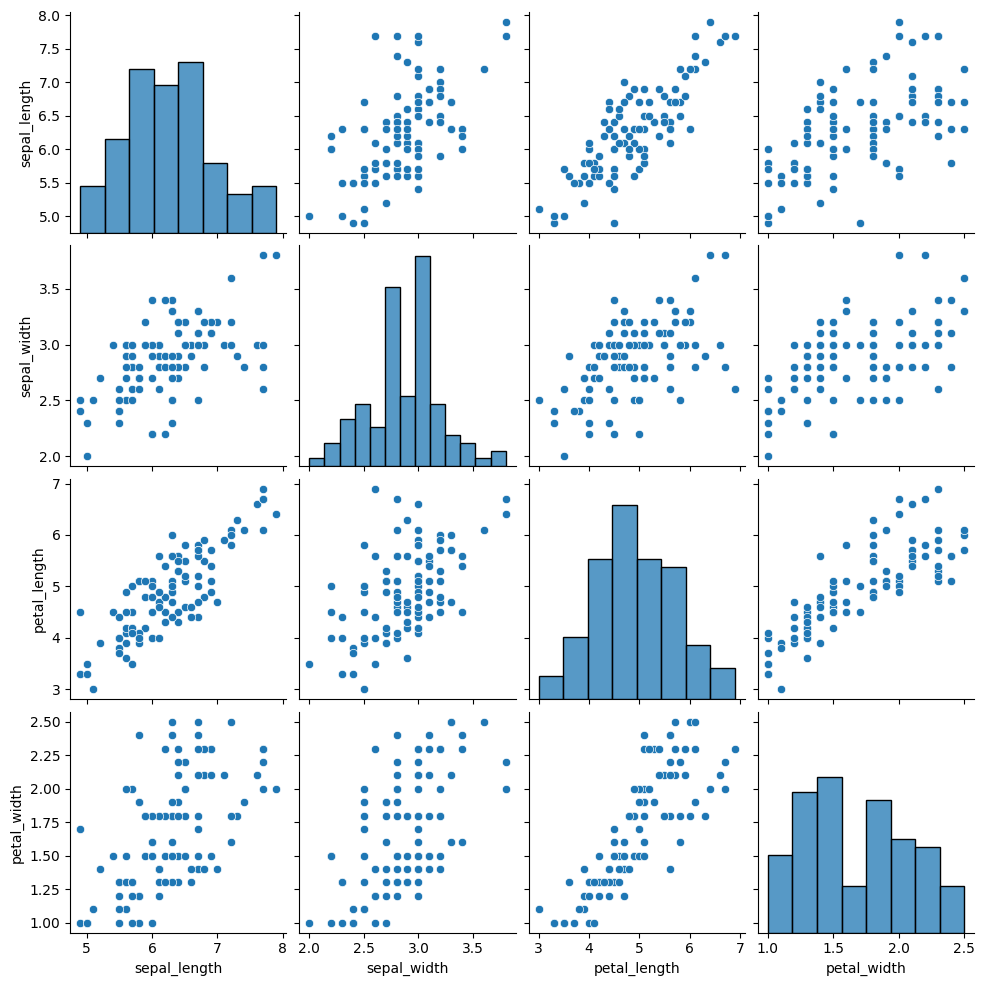

In [33]:
sns.pairplot(df)

In [54]:
from sklearn.metrics import accuracy_score,precision_recall_curve,confusion_matrix,f1_score

In [36]:
confusion_matrix(Y_test,pred_log)

array([[16,  1],
       [ 0, 13]], dtype=int64)

In [55]:
accuracy_score(Y_test,pred_log)

0.9666666666666667

In [51]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(Y_test,pred_log))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

